# Table of Contents
## Plotly
[1. Interactive vs static visualisation](#Interactive-vs-static-visualisation)  
[2. Basics of Plotly](#Basics-of-plotly)  
[3. Using pandas](#Using-pandas)  
[4. Using cufflinks](#Using-cufflinks)  
[5. Interactivity](#Interactivity)  
[6. Other plots](#Other-plots)

[7. More Information](#More-information)

In [1]:
import plotly.graph_objs as go
import plotly.offline as pltly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pltly.init_notebook_mode(connected=True)
%matplotlib inline

## Interactive vs static visualisation

### Some existing packages
* [Plotly](https://plot.ly/) - used in this tutorial  
* [Bokeh](bokeh.pydata.org)
* [mpld3](http://mpld3.github.io/)
* [Holoviews](http://holoviews.org/)

### Basic comparison

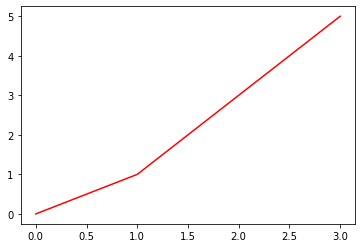

In [2]:
plt.plot([0, 1, 3], [0, 1, 5], color='red')

In [3]:
pltly.iplot([go.Scatter(x=[0, 1, 3], y=[0, 1, 5], line=dict(color='red'))])

### More complex comparison
We will return to plot this in [section 3](#Using-pandas)

In [4]:
df = pd.read_csv('./data/time_series_60min_singleindex.csv', index_col=0, parse_dates=True, low_memory=False)

In [5]:
de_solar = df.DE_solar_generation.dropna()

In [6]:
de_solar.count

<bound method Series.count of utc_timestamp
2011-12-31 23:00:00+00:00    0.0
2012-01-01 00:00:00+00:00    0.0
2012-01-01 01:00:00+00:00    0.0
2012-01-01 02:00:00+00:00    0.0
2012-01-01 03:00:00+00:00    0.0
                            ... 
2016-12-31 18:00:00+00:00    0.0
2016-12-31 19:00:00+00:00    0.0
2016-12-31 20:00:00+00:00    0.0
2016-12-31 21:00:00+00:00    0.0
2016-12-31 22:00:00+00:00    0.0
Name: DE_solar_generation, Length: 43778, dtype: float64>

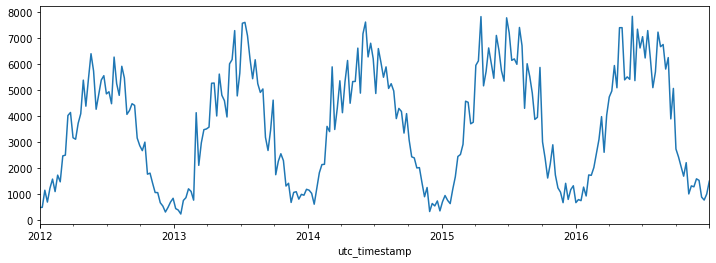

In [7]:
de_solar.resample('7D').mean().plot(figsize=(12, 4))

In [8]:
pltly.iplot([go.Scatter(x=de_solar.resample('7D').mean().index,
                        y=de_solar.resample('7D').mean().values)
            ])

## Basics of Plotly

Full API is available at: https://plot.ly/python/reference

Keep this open to refer to during the session

In [9]:
data = [go.Scatter(x=[0, 1, 3], y=[0, 1, 5], line=dict(color='red'))] # define data
pltly.iplot(data) # plot data

In [10]:
data  # `data` is just a list of dictionaries

[Scatter({
     'line': {'color': 'red'}, 'x': [0, 1, 3], 'y': [0, 1, 5]
 })]

In [11]:
data[0]['line']['color']='blue' # Update line colour by editing dictionary
pltly.iplot(data) # Plot data
data

[Scatter({
     'line': {'color': 'blue'}, 'x': [0, 1, 3], 'y': [0, 1, 5]
 })]

In [12]:
data = [go.Scatter(x=[0, 1, 3], y=[0, 1, 5],
                   line=dict(color='red', dash='dash', width=0.2), # change line vis
                   marker=dict(symbol=0, size=10) # change marker vis
                  )]
pltly.iplot(data)

In [13]:
data = [go.Scatter(x=[0, 1, 3], y=[0, 1, 5],
                   line=dict(color='red', dash='dash', width=0.2),
                   marker=dict(symbol=0, size=10, line=dict(width=2, color='black')),
                   name='red line'
                  ), # line 1
        go.Scatter(x=[0, 1, 3], y=[5, 2, 0],
                   line=dict(color='blue', dash='solid', width=0.1),
                   marker=dict(symbol="asterisk", size=10, line=dict(width=1, color='blue')),
                   name='blue line'
                  ) # line 2
       ]
pltly.iplot(data)

### Data and Layout

Where data to be plotted is given within the `data` dictionary, information related to the axes is given in the `Layout` dictionary.

In [14]:
data = [go.Scatter(x=[0, 1, 3], y=[0, 1, 5],
                   line=dict(color='red', dash='dash', width=0.2),
                   marker=dict(symbol=0, size=10, line=dict(width=2, color='black')),
                   name='red line'
                  )]
layout = go.Layout(xaxis=dict(title='the x-axis', range=[0,100]),
                   yaxis=dict(title='the y-axis'),
                   height=300, width=800)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)
fig

### Subplots - plotly tools
For more information, see https://plot.ly/python/subplots/

In [15]:
from plotly import tools

In [16]:
trace1 = go.Scatter(x=[0, 1, 3], y=[0, 1, 5], name='top line')
trace2 = go.Scatter(x=[0, 1, 3], y=[4, 3, 2], name='bottom line')

# create the subplots
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top figure', 'Bottom figure'))

# assign traces to the specific plots
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

layout = dict(title='Multiple Subplots', 
              xaxis=dict(range=[0,4], 
                         title='x-axis')
             )
fig['layout'].update(layout)

pltly.iplot(fig)

D:\Anaconda3\envs\d_py36_vis-tutorial\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Sharing Axes

In [17]:
trace1 = go.Scatter(x=[0, 1, 3], y=[0, 1, 5], name='top line')
trace2 = go.Scatter(x=[0, 1, 3], y=[4, 3, 2], name='bottom line')

fig = tools.make_subplots(rows=2, cols=1, 
                          subplot_titles=('Top figure', 'Bottom figure'), 
                          shared_xaxes=True,
                          vertical_spacing=0.3)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1) # second row is below first row

layout = dict(title='Multiple Subplots', 
              xaxis=dict(range=[0, 4], 
                         title='shared x-axis')
             )
fig['layout'].update(layout)

pltly.iplot(fig)
fig

### Subplots - Layout method

In [18]:
trace1 = go.Scatter(x=[0, 1, 3], y=[0, 1, 5], name='top line', xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=[0, 1, 3], y=[4, 3, 2], name='bottom line', xaxis='x1', yaxis='y1')

layout = dict(title='Multiple Subplots',
              xaxis1=dict(range=[0,4], 
                          title='x-axis 1'), 
              xaxis2=dict(anchor='y2', # anchor = the axis to which this axis aligns zero
                          range=[0,4], 
                          title='x-axis 2'), 
              yaxis1=dict(domain=[0,0.4],
                          range=[0,5], 
                          title='y-axis 1'), 
              yaxis2=dict(domain=[0.6,1],
                          range=[0,6], 
                          title='y-axis 2')
                      
             )

fig = go.Figure(data=[trace1, trace2], layout=layout)

pltly.iplot(fig)

#### Sharing Axes

In [19]:
trace1 = go.Scatter(x=[0, 1, 3], y=[0, 1, 5], name='top line', xaxis='x1', yaxis='y2')
trace2 = go.Scatter(x=[0, 1, 3], y=[4, 3, 2], name='bottom line', xaxis='x1', yaxis='y1')

layout = dict(title='Multiple Subplots',
              xaxis1=dict(anchor='y1',
                          range=[0,4], 
                          title='x-axis 1'),
              yaxis1=dict(domain=[0,0.4],
                          range=[0,5], 
                          title='y-axis 1'), 
              yaxis2=dict(domain=[0.6,1],
                          range=[0,6], 
                          title='y-axis 2')
                      
             )

fig = go.Figure(data=[trace1, trace2], layout=layout)

pltly.iplot(fig)

In [20]:
trace1 = go.Scatter(x=[0, 1, 3], y=[0, 1, 5], name='Line 1', xaxis='x1', yaxis='y2')
trace2 = go.Scatter(x=[0, 1, 3], y=[4, 3, 2], name='Line 2', xaxis='x1', yaxis='y1')
trace3 = go.Scatter(x=[0, 2, 3], y=[0, 2, 5], name='Line 3', xaxis='x2', yaxis='y2')
trace4 = go.Scatter(x=[0, 0.5, 3.5], y=[5, 3, 1], name='Line 4', xaxis='x2', yaxis='y1')

layout = dict(title='Even more Subplots',
              xaxis1=dict(domain=[0,0.49], # left
                          anchor='y1',
                          range=[0,4], 
                          title='x-axis 1'),
              xaxis2=dict(domain=[0.51,1], # right
                          anchor='y1',
                          range=[0,4], 
                          title='x-axis 1'),
              yaxis1=dict(domain=[0,0.4], # bottom
                          range=[0,6], 
                          title='y-axis 1'), 
              yaxis2=dict(domain=[0.6,1], # top
                          range=[0,6], 
                          title='y-axis 2')
                      
             )

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

pltly.iplot(fig)

### Exercise: basics

In [21]:
#
# Data
#

ldc = [1, 0.8, 0.75, 0.7, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
coal = [0.43] * len(ldc)
x_values = np.linspace(0, 8760, num=len(ldc))

<img src="web-based-1.png" />

In [22]:
data = [
    go.Scatter(x=x_values, y=ldc, name='Load duration curve', line=dict(color='blue'), mode='lines'),
    go.Scatter(x=x_values, y=coal, name='Coal generation', line=dict(color='orange'), mode='lines')
]
layout = go.Layout(
    yaxis=dict(title='Capacity Requirement', range=(0, 1)),
    xaxis=dict(title='Hours per year', showgrid=False, range=(0, 8760))
)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

## Using Pandas

In [23]:
data = [go.Scatter(x=de_solar.resample('7D').mean().index,
                   y=de_solar.resample('7D').mean().values)]
layout = dict(height=400, width = 800)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

In [24]:
trace_week = go.Scatter(x=de_solar.resample('7D').mean().index,
                        y=de_solar.resample('7D').mean().values,
                        name='weekly')
trace_month = go.Scatter(x=de_solar.resample('1M').mean().index,
                         y=de_solar.resample('1M').mean().values,
                         mode='markers', 
                         marker=dict(symbol='line-ew-open', color='orange', size=5), # symbol names given in API reference
                         name='monthly')
layout = dict(height=400, width = 800)
fig = go.Figure(data=[trace_week, trace_month], layout=layout)
pltly.iplot(fig)

In [25]:
trace_week = go.Scatter(x=de_solar.resample('7D').mean().index,
                        y=de_solar.resample('7D').mean().values,
                        name='weekly')
trace_month = go.Bar(x=de_solar.resample('1M').mean().index,
                     y=de_solar.resample('1M').mean().values,
                     marker=dict(color='orange'), # symbol names given in API reference
                     text=[str(i).split('-')[0] + '-' + str(i).split('-')[1] for i in de_solar.resample('1M').mean().index],
                     name='monthly')
layout = dict(height=400, width = 800)
fig = go.Figure(data=[trace_week, trace_month], layout=layout)
pltly.iplot(fig)

In [26]:
df_wind = df.loc[:, [
    'CZ_wind_onshore_generation',
    'DK_wind_offshore_generation',
    'DK_wind_onshore_generation',
    'SE_wind_generation'
]]

df_wind = df_wind.rename(columns={
    k: k.replace('_wind_', ' ').replace('_generation', '') for k in df_wind.columns
})

data = [] # initialise the data list

# Iterate over the columns, adding each scatter to our data list
for column in df_wind.columns:
    data.append(go.Scatter(x=df_wind.resample('1M').mean()[column].loc['2012':'2015-06'].index,
                       y=df_wind.resample('1M').mean()[column].loc['2012':'2015-06'].values,
                       name=column))
layout = dict(height=400, width = 800)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

### Using cufflinks
https://github.com/santosjorge/cufflinks

In [27]:
import cufflinks as cf

In [28]:
cf.set_config_file(offline=True, world_readable=True, theme='white')
df_wind.resample('1M').mean().loc['2012':'2015-06'].iplot(kind='scatter')

In [29]:
df_wind.resample('12M').mean().loc['2012':].iplot(kind='barh', 
                                                  barmode='stack')

### Colourmaps
For more information, see https://plot.ly/pandas/colorlover/ and http://seaborn.pydata.org/tutorial/color_palettes.html

In [30]:
import colorlover as cl
import seaborn as sns

In [31]:
colormap = cl.scales[str(len(df_wind.columns))]['seq']['Blues']
df_wind.resample('1M').mean().loc['2012':'2015-06'].iplot(kind='scatter', colors=colormap)

In [32]:
colormap = sns.color_palette('colorblind', len(df_wind.columns)).as_hex()
df_wind.resample('1M').mean().loc['2012':'2015-06'].iplot(kind='scatter', colors=colormap)

## Interactivity

In [33]:
# - Use `legendgroup` to group datasets, they will turn on/off together when legend entries are clicked - #
data = []

for column in df_wind.columns:
    if 'DK' in column:
        group = 'DK'
    else:
        group = column
    data.append(go.Scatter(x=df_wind.resample('1M').mean()[column].loc['2012':'2015-06'].index,
                           y=df_wind.resample('1M').mean()[column].loc['2012':'2015-06'].values,
                           name=column,
                           legendgroup=group))
layout = dict(height=400, width = 800)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

In [34]:
# - Use `hoverinfo` to change the information given on hovering over the data - #
data = []
df_wind_monthly = df_wind.resample('1M').mean().loc['2012':'2015-06']
for column in df_wind.columns:
    if 'DK' in column:
        group = 'DK'
    else:
        group = column
    data.append(go.Scatter(x=df_wind_monthly[column].index,
                           y=df_wind_monthly[column].values,
                           text=np.round(df_wind_monthly[column].values,0),
                           name=column,
                           hoverinfo='x+text'))
layout = dict(height=400, width = 800)
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

## Exercise 2

Your task: visualise the monthly and annual means from the df_wind data from above, using subplots and connected layout.

* You want to resample the data, e.g. with df_wind.resample('12M').mean()
* As with go.Scatter(), you can plot bar charts with go.Bar()
* Bars can be stacked by editing the layout function to include `barmode='stack'` 
* Try cufflinks and pure plotly to test their strengths and weaknesses

Your output might look something like:

<img src="web-based-2.png" />

In [35]:
data = []
colors = cl.scales[str(len(df_wind.columns))]['div']['Spectral']
# or perhaps colors = sns.color_palette('bright', len(df_wind.columns)).as_hex()
color_index = 0
for column in df_wind.columns:
    data.append(go.Scatter(x=df_wind.resample('1M').mean()[column].loc['2012':'2016'].index,
                           y=df_wind.resample('1M').mean()[column].loc['2012':'2016'].values,
                           name=column,
                           xaxis='x1',
                           yaxis='y1',
                           line=dict(color=colors[color_index]),
                           legendgroup=column))
    data.append(go.Bar(x=df_wind.resample('12M').sum()[column].loc['2012':'2016'].index,
                       y=df_wind.resample('12M').sum()[column].loc['2012':'2016'].values,
                       name=column,
                       xaxis='x2',
                       yaxis='y2',
                       marker=dict(color=colors[color_index]),
                       showlegend=False,
                       legendgroup=column,
                       text=['%.2E' % i for i in df_wind.resample('12M').sum()[column].loc['2012':'2016'].values],
                       hoverinfo='text'))
    color_index += 1
layout = dict(barmode='stack', height=400, width=800,
              xaxis1=dict(domain=[0,0.49], title='Monthly variation'),
              xaxis2=dict(domain=[0.51,1], title='Annual variation'),
              yaxis1=dict(range=[0,3500]),
              yaxis2=dict(anchor='x2', range=[0, 35e6], side='right'),
              legend=dict(orientation='h', xanchor='center',yanchor='bottom', x=0.5, y=1))
fig = go.Figure(data=data, layout=layout)
pltly.iplot(fig)

## Other plots

In [36]:
wind_cfs = df_wind.loc['2015'].resample('1M').mean()
wind_cfs.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
wind_cfs = wind_cfs / (wind_cfs.max() * 1.1)

wind_cfs

,CZ onshore,DK offshore,DK onshore,SE generation
Jan,0.749944,0.905740,0.696730,0.628838
Feb,0.637624,0.744340,0.600031,0.683033
Mar,0.765618,0.561046,0.549160,0.578612
Apr,0.631445,0.628208,0.493790,0.561939
May,0.521664,0.725259,0.566052,0.492596
Jun,0.509998,0.590426,0.453044,0.431740
Jul,0.544873,0.620565,0.478868,0.359253
Aug,0.550070,0.511696,0.340699,0.349887
Sep,0.649631,0.657835,0.415291,0.463352
Oct,0.551280,0.570200,0.405202,0.486721


In [37]:
data = []
for column in wind_cfs.columns:
    data.append(go.Box(y=wind_cfs[column].values, name=column))
pltly.iplot(data)

In [38]:
import plotly.figure_factory as ff
wind_cfs = df_wind.loc['2015'].resample('1D').mean()
wind_cfs = wind_cfs / (wind_cfs.max() * 1.1)
data = wind_cfs.stack().reset_index()
data.index=data.utc_timestamp
fig = ff.create_violin(data, data_header=0, group_header='level_1', height=500, width=800)
pltly.iplot(fig, filename='Multiple Violins')

In [39]:
from scipy import stats

# create dataframe
np.random.seed(619517)
Nr=250
y = np.random.randn(Nr)
gr = np.random.choice(list("ABCDE"), Nr)
norm_params=[(0, 1.2), (0.7, 1), (-0.5, 1.4), (0.3, 1), (0.8, 0.9)]

for i, letter in enumerate("ABCDE"):
    y[gr == letter] *=norm_params[i][1]+ norm_params[i][0]
df = pd.DataFrame(dict(Score=y, Group=gr))

## More information

See https://plot.ly/python/reference for the full plotly API library 